In [1]:
# Accept–Reject Sampling 教程代码
import numpy as np
import matplotlib.pyplot as plt
from math import erf, sqrt, pi

# 1. 通用接受–拒绝采样器

In [2]:
def accept_reject(f, a, b, M, n_samples, rng=None):
    """
    从区间 [a,b] 内，使用矩形包络高度 M，对非负函数 f 进行接受-拒绝采样。
    返回 n_samples 个样本。
    """
    if rng is None:
        rng = np.random.default_rng()
    xs = []
    while len(xs) < n_samples:
        x = rng.uniform(a, b)
        y = rng.uniform(0.0, M)
        if y < f(x):
            xs.append(x)
    return np.array(xs)

def estimate_M_on_grid(f, a, b, grids=20000):
    """在等距网格上近似求 f 的最大值"""
    xs = np.linspace(a, b, grids)
    return np.max(f(xs))

print("✅ Sampler ready.")

✅ Sampler ready.


# 2. 三个目标函数

In [3]:
f_a = lambda x: np.cos(x)**2
f_b = lambda x: np.sin(x) + np.cos(x) + 2.0
f_c = lambda x: (np.sin(x) + np.cos(x)) / (np.sinh(x) + np.cosh(x)) + 25.0

targets = [
    ("cos^2(x)", f_a, -np.pi, np.pi),
    ("sin(x)+cos(x)+2", f_b, -np.pi, np.pi),
    ("(sin+cos)/(sinh+cosh)+25", f_c, -2.0, 2.0),
]

# 3. 采样并画图

C:\Users\X\AppData\Local\Temp\ipykernel_29400\1007891995.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(fx, grid)


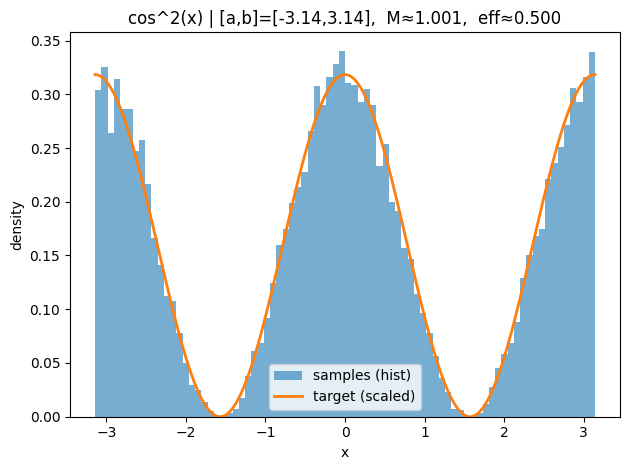

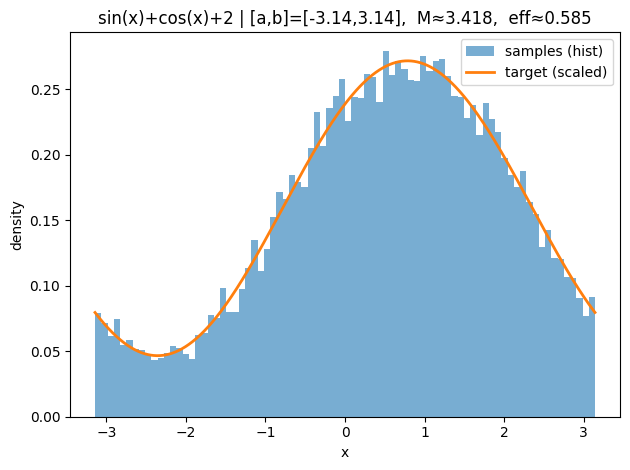

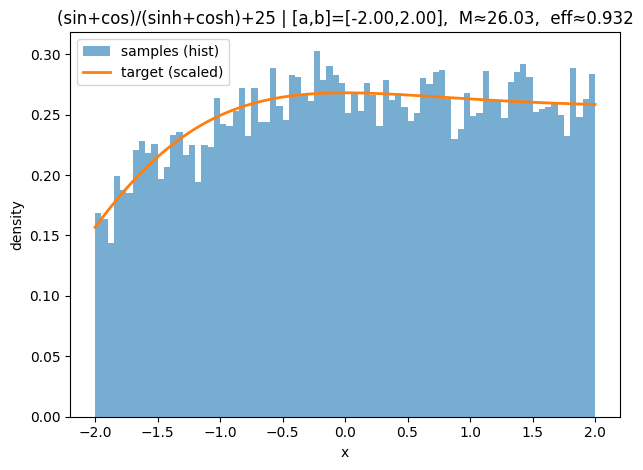

In [4]:
for name, f, a, b in targets:
    M = estimate_M_on_grid(f, a, b) * 1.001
    xs = accept_reject(f, a, b, M, n_samples=20000, rng=np.random.default_rng(0))

    grid = np.linspace(a, b, 2000)
    fx = f(grid)
    area = np.trapz(fx, grid)
    pdf = fx / area
    eff = area / ((b - a) * M)

    plt.figure()
    plt.hist(xs, bins=80, range=(a, b), density=True, alpha=0.6, label="samples (hist)")
    plt.plot(grid, pdf, linewidth=2, label="target (scaled)")
    plt.title(f"{name} | [a,b]=[{a:.2f},{b:.2f}],  M≈{M:.4g},  eff≈{eff:.3f}")
    plt.xlabel("x"); plt.ylabel("density")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 4. 正态分布的接受效率 vs kσ

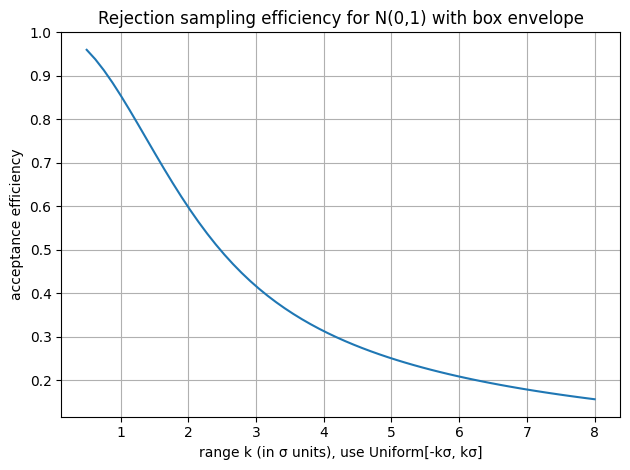

Efficiency at k=8σ ≈ 0.15666426716443732


In [5]:
def normal_efficiency_vs_k(k):
    phi0 = 1.0 / sqrt(2 * pi)          # φ(0)
    mass = erf(k / sqrt(2))            # ∫_{-k}^{k} φ(x) dx
    return mass / (2 * k * phi0)

ks = np.linspace(0.5, 8.0, 60)
effs = [normal_efficiency_vs_k(k) for k in ks]

plt.figure()
plt.plot(ks, effs)
plt.xlabel("range k (in σ units), use Uniform[-kσ, kσ]")
plt.ylabel("acceptance efficiency")
plt.title("Rejection sampling efficiency for N(0,1) with box envelope")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Efficiency at k=8σ ≈", normal_efficiency_vs_k(8.0))

# 5. 2D 例子（f(x,y)=exp(-x^2 - y^2)）

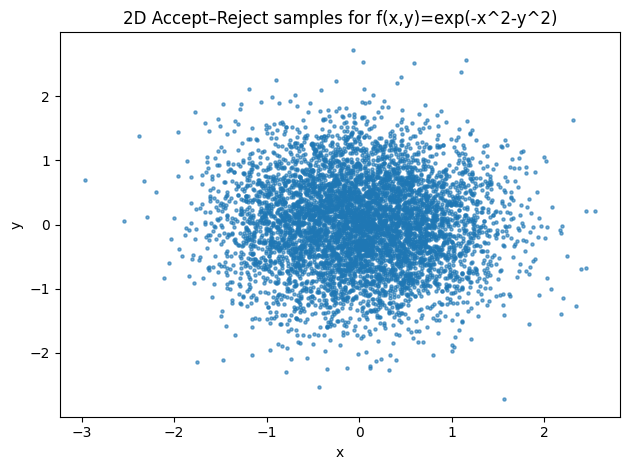

In [6]:
def ar2d_example(n_samples=5000, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    def f(xy):
        x, y = xy[...,0], xy[...,1]
        return np.exp(-(x**2 + y**2))
    a = 3.0
    area = (2*a)*(2*a)
    C = area
    xs = []
    while len(xs) < n_samples:
        x = rng.uniform(-a, a)
        y = rng.uniform(-a, a)
        u = rng.uniform(0.0, 1.0)
        if u < f(np.array([x,y])):
            xs.append([x,y])
    return np.array(xs)

pts = ar2d_example(6000, rng=np.random.default_rng(1))
plt.figure()
plt.scatter(pts[:,0], pts[:,1], s=5, alpha=0.6)
plt.title("2D Accept–Reject samples for f(x,y)=exp(-x^2-y^2)")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout()
plt.show()